## Random Walk

This notebook is for experimenting with random walks. Inspired by 'Module A: Brownian Motion on a Spreadsheet, a Tutorial' from Nassim Nicholas Taleb's book Dynamic Hedging: Managing Vanilla and Exotic Options.

Citation: Taleb, N.N. (1997). *Dynamic Hedging: Managing Vanilla and Exotic Options*, New York: John Wiley & Sons, Inc. 

In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt

### Single Asset Example

In [2]:
days = 248
t = 1/days
s = 100
vol = 0.157

random = np.random.normal(size=days)

prices = []

for i in range(len(random)):
    if i == 0:
        prices.append(s)
    else:
        price = prices[i-1]*np.exp(-.5*(vol**2)*t + vol*np.sqrt(t)*random[i])
        prices.append(price)

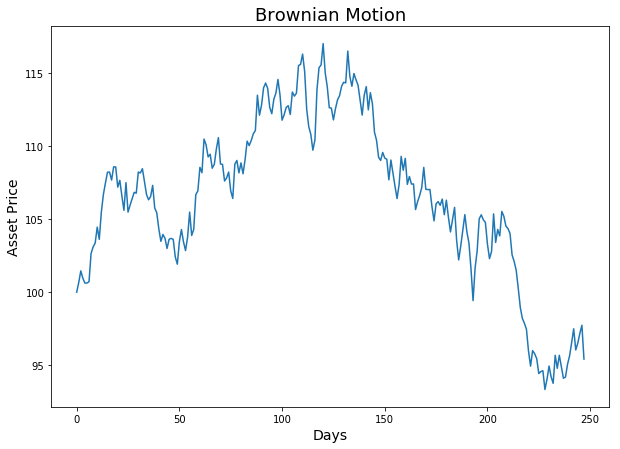

In [3]:
plt.figure(figsize=(10,7))

plt.plot(prices)
plt.title('Brownian Motion', fontsize=18)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Asset Price', fontsize=14);

In [4]:
df = pd.DataFrame({'Day':range(days),'Asset_Price':prices})

In [5]:
df['Returns'] = df['Asset_Price'].diff()

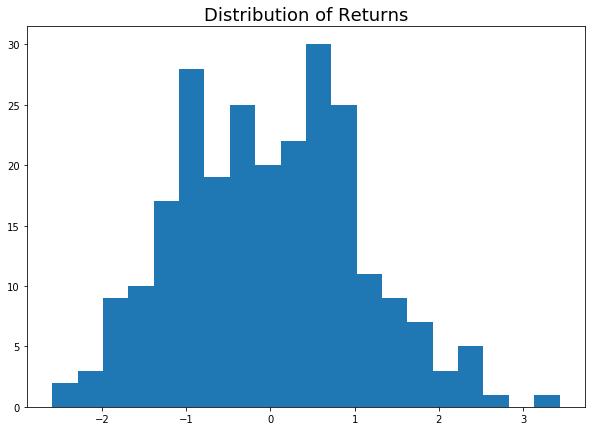

In [10]:
plt.figure(figsize=(10,7))

plt.hist(df['Returns'], bins=20)
plt.title('Distribution of Returns', fontsize=18);

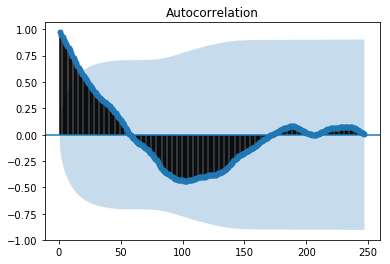

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ax = plot_acf(df['Asset_Price'], zero=False);

In [27]:
df.index = pd.DatetimeIndex(start='2012-01-01', periods=df.shape[0], freq='D')

In [29]:
from statsmodels.tsa.arima_model import ARIMA

ar1 = ARIMA(endog=df['Asset_Price'], order=(1,0,0))
model = ar1.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Asset_Price   No. Observations:                  248
Model:                     ARMA(1, 0)   Log Likelihood                -371.093
Method:                       css-mle   S.D. of innovations              1.073
Date:                Tue, 26 Feb 2019   AIC                            748.186
Time:                        10:28:40   BIC                            758.726
Sample:                    01-01-2012   HQIC                           752.429
                         - 09-04-2012                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               103.2929      4.049     25.513      0.000      95.358     111.228
ar.L1.Asset_Price     0.9856      0.010     98.004      0.000       0.966       1.005
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0146           +0.0000j            1.0146            0.0000
-----------------------------------------------------------------------------
"""

## Dickey-Fuller Test

In [34]:
from statsmodels.tsa.stattools import adfuller

X = df['Asset_Price']
result = adfuller(X)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, round(value, 3)))

ADF Statistic: -1.0876976333610173
p-value: 0.7199529289876928
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
